# Model Selection In-Class Exercise

In this example, we will try to fit a simple 

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Generate synthetic data

We illustrate the model order selection on a *synthetic dataset*.

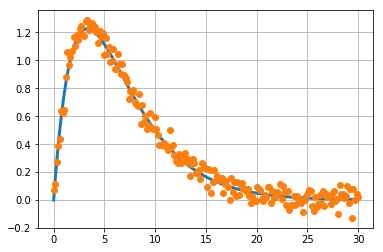

In [71]:
# Generate data
nx = 200
x = np.linspace(0,30,nx)
y0 = x*np.exp(-0.3*x)
y = y0 + np.random.normal(0,0.05,nx)

plt.plot(x,y0, linewidth=3)
plt.plot(x,y,'o')
plt.grid()

## Load the Data

The data in this exercise is completely synthetic.  You can load it with the following commmand.

In [ ]:
fn = 'synth_data.p'
with open(fn,'wb') as fp:
    pickle.dump([x,y], fp)

Plot the data `y` vs. `x` using a scatter plot. 

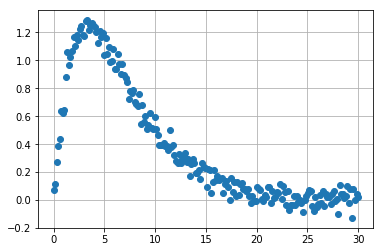

In [76]:
# TODO
plt.plot(x,y,'o')
plt.grid()

## Fit the Data

We will now try to fit the data.  First, split the data into training and test.  You can use the `train_test_split()` method in the `sklearn` package.

In [80]:
# TODO
# xtr, xts, ytr, yts = train_test_split(...)
xtr, xts, ytr, yts = train_test_split(x,y,test_size=0.5)

Now try to fit a linear model to the data.  You can pick any linear model with a variable number `d` of basis functions.  For example, you can use the polynomials up to degree `d-1`.  

For each model order `d`:
* Fit the model on the training data
* Test the model on the test data

Plot the test error vs. `d`.  Select the model order `dopt` with the lowest test error.

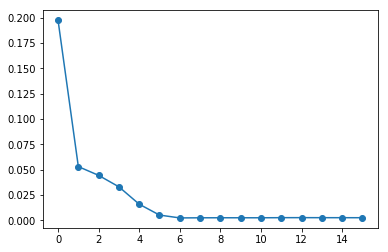

In [85]:
# TODO
dmax = 15
dtest = np.arange(dmax+1)
nd = len(dtest)

rss = np.zeros(nd)
for i, d in enumerate(dtest):
    beta = np.polyfit(xtr,ytr,deg=d)
    yhat = np.polyval(beta,xts)
    rss[i] = np.mean((yhat-yts)**2)

plt.plot(dtest,rss, 'o-')

In [87]:
iopt = np.argmin(rss)
dopt = dtest[iopt]
beta = np.polyfit(xtr,ytr,deg=dopt)

6

Re-fit the model with the optimal model order.  On a single plot, 
* Plot the test data `xts` and `yts`
* Plot the predicted value `yhat` of your estimated function for `x` in the range `[0,35]`.
Is your model visually a good fit?  

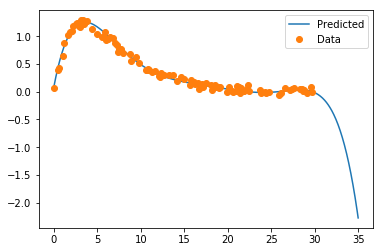

In [91]:
# TODO
xp = np.linspace(0,35,1000)
yp = np.polyval(beta,xp)
plt.plot(xp,yp)
plt.plot(xts,yts,'o')
plt.legend(['Predicted', 'Data'])

## A Better Solution using Transformations

We see that a simple polynomial model does a poor prediction for `x` outside the range of the training data.  One solution is to use a different set of basis functions.  Specifically, we assume the true function is:

    yhat = f(x) = \sum_j w[j]*z[j],   z[j] = phi_j(x)
    
where `phi_j(x)` is some basis functions have the property that

    phi_j(x) = 0   for x = 0  and x -> \infty
    
One possible basis function is to take `u = 1-exp(-a*x)` which maps `x \in [0,\infty)` to `u\in [0,1)`.  Then, we take the basis functions `phi_j(x) = sin(pi*(j+1)*u)`.  

In [94]:
def transform(x,d):
    a = 0.1
    u = 1-np.exp(-a*x)    
    dvals = np.arange(1,d+1)
    z = np.sin(np.pi*u[:,None]*dvals[None,:])    
    return z

Now we run the model fitting as before.

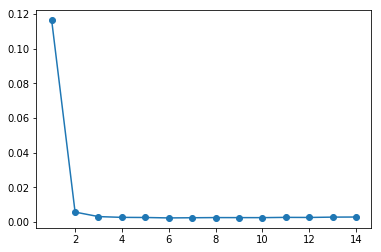

In [96]:
dmax = 15
dtest = np.arange(1,dmax+1)
nd = len(dtest)

rss = np.zeros(nd)
for i, d in enumerate(dtest):
    
    # Trasform the training and test data
    ztr = transform(xtr,d)
    zts = transform(xts,d)
    
    # Fit the data without an intercept
    regr = LinearRegression(fit_intercept=False)
    regr.fit(ztr,ytr)
    
    # Measure the test error
    yhat = regr.predict(zts)
    rss[i] = np.mean((yhat-yts)**2)

plt.plot(dtest,rss, 'o-')

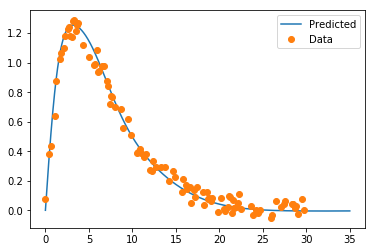

In [97]:
iopt = np.argmin(rss)
dopt = dtest[iopt]

# Trasform the training and test data
ztr = transform(xtr,dopt)
    
# Fit the data without an intercept
regr = LinearRegression(fit_intercept=False)
regr.fit(ztr,ytr)

xp = np.linspace(0,35,1000)
zp = transform(xp,dopt)
yp = regr.predict(zp)
plt.plot(xp,yp)
plt.plot(xts,yts,'o')
plt.legend(['Predicted', 'Data'])